In [1]:
import numpy as np
import math
import pandas 
import random 
import time
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [2]:
dataframe = pandas.read_csv("ionosphere_data.csv")

In [3]:
#print(dataframe.head())

In [4]:
#print(dataframe.describe())

In [5]:
#print("Shape:", dataframe.shape)

In [6]:
#print("Data Types:", dataframe.dtypes)

In [7]:
#print("Correlation:", dataframe.corr(method='pearson'))

In [8]:
#print(dataframe.values)

In [9]:
#shuffle
dataset = np.array(dataframe.values)
dataset_shuf = []
index_shuf = list(range(len(dataset)))
random.shuffle(index_shuf)
for i in index_shuf:
    dataset_shuf.append(dataset[i,:])   
dataset_shuf = np.array(dataset_shuf)
dataset_shuf.reshape(350,35)

print("")

In [10]:
#ont hot g = 0 b = 1
for i in range(350) :
    if dataset_shuf[i,34] == 'g' :
        dataset_shuf[i,34] = 0
    elif dataset_shuf[i,34] == 'b' :
        dataset_shuf[i,34] = 1
#print(dataset_shuf)

print("")

In [11]:
X_train = dataset_shuf[:270,0:34]
Y_train = dataset_shuf[:270,34:35]
X_train.reshape(270,34)
Y_train.reshape(270,1)

X_test = dataset_shuf[270:,0:34]
Y_test = dataset_shuf[270:,34:35]
X_test.reshape(80,34)
Y_test.reshape(80,1)
print("")

In [12]:
pandas.DataFrame(Y_train)
print("")

In [13]:
def ReLU(x) :
    return x * (x > 0) + 0.01 * x * (x <= 0)

def ReLU_der(x) :
    return 1 * (x > 0) + 0.01 * (x <= 0)
    
def Sigmoid(x) :
    x = x.astype('float64')
    return 1/(1+np.exp(-x))

def Sigmoid_der(x) :
    x = x.astype('float64')
    return Sigmoid(x) * (1 - Sigmoid(x))

def limit(x) :  
    while(np.max(x) > 0.1 or np.min(x) < -0.1) : 
            x /= 10
    return x 
def error(x, y) :
    CEE = 0
    for i in range(len(y)):
        if y[i] == 0 :
            CEE += -math.log(1-x[i])
        elif y[i] == 1:    
            CEE += -math.log(x[i])
    return CEE

now training  0.0 %
now training  5.0 %
now training  10.0 %
now training  15.0 %
now training  20.0 %
now training  25.0 %
now training  30.0 %
now training  35.0 %
now training  40.0 %
now training  45.0 %
now training  50.0 %
now training  55.0 %
now training  60.0 %
now training  65.0 %
now training  70.0 %
now training  75.0 %
now training  80.0 %
now training  85.0 %
now training  90.0 %
now training  95.0 %
------------------------------------
last Layer Node:  2
-
train error: 44.30186047114578
test error: 29.03287042889294


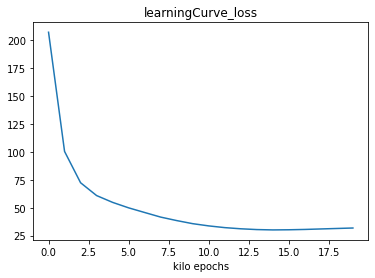

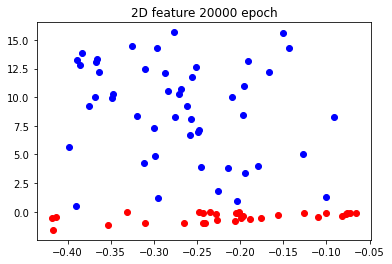

------------------------------------
now training  0.0 %
now training  5.0 %
now training  10.0 %
now training  15.0 %
now training  20.0 %
now training  25.0 %
now training  30.0 %
now training  35.0 %
now training  40.0 %
now training  45.0 %
now training  50.0 %
now training  55.0 %
now training  60.0 %
now training  65.0 %
now training  70.0 %
now training  75.0 %
now training  80.0 %
now training  85.0 %
now training  90.0 %
now training  95.0 %
------------------------------------
last Layer Node:  3
-
train error: 7.633003818633944
test error: 38.761438391934846


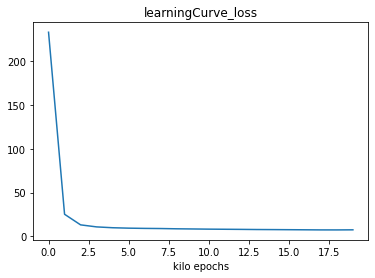

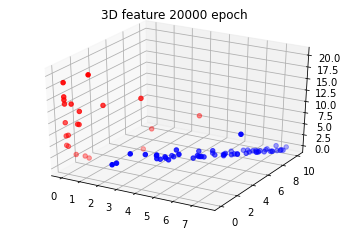


------------------------------------
end


In [14]:
epochtimes = 20000
mini_batch = 16
bestloss1 = 1e30 #Mini Batch Loss
preloss = 1e30   #decay the learning rate
start = time.time()

    
for i in range(2):

    lastLayerNode = i + 2

    #define weight:

    weight_hidden = np.random.random((34,32))-0.5
    weight_hidden2 = np.random.random((32,32))-0.5
    weight_hidden3 = np.random.random((32,32))-0.5
    weight_hidden4 = np.random.random((32,16))-0.5
    weight_hidden5 = np.random.random((16,lastLayerNode))-0.5
    weight_output = np.random.random((lastLayerNode,1))-0.5
    lr = 0.003

    bias = 0.01
    bias1 = 0.01
    bias2 = 0.01
    bias3 = 0.01
    bias4 = 0.01
    bias5 = 0.01

    ######
    
    lossCurve = []
    
    for epoch in range(epochtimes):
        X_train_random = []
        Y_train_random = []
        for i in range(mini_batch):
            rindex = random.randint(0,len(X_train)-1)
            X_train_random.append(X_train[rindex,:])
            Y_train_random.append(Y_train[rindex,:])
        X_train_random = np.array(X_train_random)
        Y_train_random = np.array(Y_train_random)



        input_hidden = np.dot(X_train_random, weight_hidden) + bias
        output_hidden = ReLU(input_hidden)

        input_hidden2 = np.dot(output_hidden, weight_hidden2) + bias1
        output_hidden2 = ReLU(input_hidden2)
        input_hidden3 = np.dot(output_hidden2, weight_hidden3) + bias2
        output_hidden3 = ReLU(input_hidden3)
        input_hidden4 = np.dot(output_hidden3, weight_hidden4) + bias3
        output_hidden4 = ReLU(input_hidden4)
        input_hidden5 = np.dot(output_hidden4, weight_hidden5) + bias4
        output_hidden5 = ReLU(input_hidden5)
        input_op = np.dot(output_hidden5, weight_output)+ bias5
        output_op = Sigmoid(input_op)


        #==========================================

        derror_douto = output_op - Y_train_random
        douto_dino = Sigmoid_der(input_op)
        dino_dwo = output_hidden5      
        derror_dwo = np.dot(dino_dwo.T, derror_douto * douto_dino)
        derror_dbias5 = derror_douto * douto_dino

        #==========================================

        derror_dino = derror_douto * douto_dino
        dino_douth5 = weight_output
        derror_douth5 = np.dot(derror_dino, dino_douth5.T)
        douth5_dinh5 = ReLU_der(input_hidden5)
        dinh5_dwh5 = output_hidden4
        derror_dwh5 = np.dot(dinh5_dwh5.T, douth5_dinh5 * derror_douth5)
        derror_dbias4 = douth5_dinh5 * derror_douth5

        #==========================================

        derror_dinh5 = derror_douth5 * douth5_dinh5
        dinh5_douth4 = weight_hidden5
        derror_douth4 = np.dot(derror_dinh5, dinh5_douth4.T)
        douth4_dinh4 = ReLU_der(input_hidden4)
        dinh4_dwh4 = output_hidden3
        derror_dwh4 = np.dot(dinh4_dwh4.T, douth4_dinh4 * derror_douth4)
        derror_dbias3 = douth4_dinh4 * derror_douth4

        #==========================================

        derror_dinh4 = derror_douth4 * douth4_dinh4
        dinh4_douth3 = weight_hidden4
        derror_douth3 = np.dot(derror_dinh4, dinh4_douth3.T)
        douth3_dinh3 = ReLU_der(input_hidden3)
        dinh3_dwh3 = output_hidden2
        derror_dwh3 = np.dot(dinh3_dwh3.T, douth3_dinh3 * derror_douth3)
        derror_dbias2 = douth3_dinh3 * derror_douth3

        #==========================================

        derror_dinh3 = derror_douth3 * douth3_dinh3
        dinh3_douth2 = weight_hidden3
        derror_douth2 = np.dot(derror_dinh3, dinh3_douth2.T)
        douth2_dinh2 = ReLU_der(input_hidden2)
        dinh2_dwh2 = output_hidden
        derror_dwh2 = np.dot(dinh2_dwh2.T, douth2_dinh2 * derror_douth2)
        derror_dbias1 = douth2_dinh2 * derror_douth2

        #==========================================

        derror_dinh2 = derror_douth2 * douth2_dinh2
        dinh2_douth = weight_hidden2
        derror_douth = np.dot(derror_dinh2, dinh2_douth.T)
        douth_dinh = ReLU_der(input_hidden)
        dinh_dwh = X_train_random
        derror_dwh = np.dot(dinh_dwh.T, douth_dinh * derror_douth)    
        derror_dbias = douth_dinh * derror_douth

        #==========================================



        weight_hidden = weight_hidden-lr * derror_dwh
        weight_hidden2 = weight_hidden2-lr * derror_dwh2
        weight_hidden3 = weight_hidden3-lr * derror_dwh3
        weight_hidden4 = weight_hidden4-lr * derror_dwh4
        weight_hidden5 = weight_hidden5-lr * derror_dwh5
        weight_output = weight_output-lr * derror_dwo

        bias -= lr * derror_dbias.sum()/np.size(derror_dbias)
        bias1 -= lr * derror_dbias1.sum()/np.size(derror_dbias1)
        bias2 -= lr * derror_dbias2.sum()/np.size(derror_dbias2)
        bias3 -= lr * derror_dbias3.sum()/np.size(derror_dbias3)
        bias4 -= lr * derror_dbias4.sum()/np.size(derror_dbias4)
        bias5 -= lr * derror_dbias5.sum()/np.size(derror_dbias5)


        #calulate error 
        if epoch % 1000 == 0 : 
            input_hidden = np.dot(X_train, weight_hidden) + bias
            output_hidden = ReLU(input_hidden)
            input_hidden2 = np.dot(output_hidden, weight_hidden2) + bias1
            output_hidden2 = ReLU(input_hidden2)
            input_hidden3 = np.dot(output_hidden2, weight_hidden3) + bias2
            output_hidden3 = ReLU(input_hidden3)
            input_hidden4 = np.dot(output_hidden3, weight_hidden4) + bias3
            output_hidden4 = ReLU(input_hidden4)
            input_hidden5 = np.dot(output_hidden4, weight_hidden5) + bias4
            output_hidden5 = ReLU(input_hidden5)
            input_op = np.dot(output_hidden5, weight_output)+ bias5
            output_op = Sigmoid(input_op)
            error_out = error(output_op, Y_train)
            lossCurve.append(error_out)

            #set decay for learning rate
            if error_out > preloss :
                lr *= 0.9

            preloss = error_out


            print('now training ',epoch*100/epochtimes,'%')
            #print(error_out)
            #print(error_out)
            #print('\n',lr * derror_dwh,'\n', lr * derror_dwo,'\n')


            #print(derror_wh, derror_wo)

            
    single_point = np.array(X_train)
    result1 = np.dot(single_point, weight_hidden)
    result2 = ReLU(result1)
    result3 = np.dot(result2, weight_hidden2)
    result4 = ReLU(result3)
    result5 = np.dot(result4, weight_hidden3)
    result6 = ReLU(result5)
    result7 = np.dot(result6, weight_hidden4)
    result8 = ReLU(result7)
    result9 = np.dot(result8, weight_hidden5)
    result10 = ReLU(result9)
    result11 = np.dot(result10, weight_output)
    result12 = Sigmoid(result11)
    print("------------------------------------")
    print("last Layer Node: ",lastLayerNode)
    print("-")
    print("train error:",error(result12, Y_train))
    
    single_point = np.array(X_test)
    result1 = np.dot(single_point, weight_hidden)
    result2 = ReLU(result1)
    result3 = np.dot(result2, weight_hidden2)
    result4 = ReLU(result3)
    result5 = np.dot(result4, weight_hidden3)
    result6 = ReLU(result5)
    result7 = np.dot(result6, weight_hidden4)
    result8 = ReLU(result7)
    result9 = np.dot(result8, weight_hidden5)
    result10 = ReLU(result9)
    result11 = np.dot(result10, weight_output)
    result12 = Sigmoid(result11)
    
    error_out = error(result12, Y_test)
    print("test error:",error_out)
    plt.plot(lossCurve)
    plt.title('learningCurve_loss')
    plt.xlabel('kilo epochs')

    plt.show()
    if (lastLayerNode == 2):
        
        group11 = [[],[]]
        group00 = [[],[]]
        for i in range(len(X_test)):
            if(result12[i]>=0.5):
                for indexx in range(2):
                    group11[indexx].append(result10[i][indexx])
            else:
                for indexx in range(2):
                    group00[indexx].append(result10[i][indexx])
        fig, aax = plt.subplots()
        aax.scatter(group00[0], group00[1],c='b')
        aax.scatter(group11[0], group11[1],c='r')
        aax.set_title('2D feature '+str(epochtimes)+' epoch');
        plt.show()
    elif (lastLayerNode == 3):
        
        group1 = [[],[],[]]
        group0 = [[],[],[]]

        for i in range(len(X_test)):
            if(result12[i]>=0.5):
                for indexx in range(3):
                    group1[indexx].append(result10[i][indexx])
            else:
                for indexx in range(3):
                    group0[indexx].append(result10[i][indexx])

        ax = plt.axes(projection='3d')
        ax.scatter3D(group1[0], group1[1], group1[2], c='r');
        ax.scatter3D(group0[0], group0[1], group0[2], c='b');
        ax.set_title('3D feature '+str(epochtimes)+' epoch');
        plt.show()
        print("")
    else:
        print("somethingWrong")
    print("------------------------------------")
print("end")
end = time.time()